<a href="https://colab.research.google.com/github/Salty134/Westbromdata/blob/main/West_brom_players.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [ ]:
# Scrape the players from Wikipedia using Beautiful Soup and the requests library

url = 'https://en.wikipedia.org/wiki/List_of_West_Bromwich_Albion_F.C._players'

response = requests.get(url)

soup = BeautifulSoup(response.content, 'lxml')

table = soup.findAll('table')

In [ ]:
# Use Pandas to parse the HTML and then create the DataFrame Object

playerslist = pd.read_html(str(table))
df = playerslist.pop(0)








In [ ]:
# replace question marks in the data with NaN so that thise columns can be converted to float dtype later on 
df.replace(['?'], np.nan, inplace = True)

# There is a mix of hyphens, em dashes and en dashes in use within the West Brom career column, so lets convert all of these to hyphens using regex 
df.replace(regex= R'[\—\-\–]+', value = '-', inplace = True)


In [ ]:
# Total apps and Total goals were showing as having the dtype object, so lets create a dictionary to map them to the desired dtypes

dtype_lookup = {'Total apps' : 'float', 
                'Total goals' : 'float'
               }

# Convert the dtypes using our mapping
df = df.astype(dtype_lookup)

In [ ]:
# Lets sort these NaNs by filling from the league columns if the value is missing

df['Total apps'].fillna(df['League apps'], inplace = True)

df['Total goals'].fillna(df['League goals'], inplace = True)




        
    

In [ ]:
# There seems to be an issue with the entry for Cyrille Regis' West Brom Career, so lets fix that

#df.iloc[22, 2] = '1977-1984'

df.iloc[16,1] = 'FW'





In [ ]:
pos_dummies = pd.get_dummies(df.Position)

df_with_dummies = df.join(pos_dummies)

df_with_dummies

,Name,Position,West Brom career,League apps,League goals,Total apps,Total goals,Notes,DF,FW,GK,MF
0,Billy Bassett,MF,1886-1899,261,61,311.0,77.0,NaN,0,0,0,1
1,Tom Pearson,FW,1886-1894,138,72,138.0,72.0,NaN,0,1,0,0
2,Roddy McLeod,FW,1891-1897,149,50,149.0,50.0,NaN,0,1,0,0
3,Jesse Pennington,DF,1903-1922,455,0,496.0,0.0,NaN,1,0,0,0
4,Sammy Timmins,MF,1906-1911,111,3,116.0,3.0,NaN,0,0,0,1
5,Fred Reed,MF,1914-1927,138,4,154.0,5.0,NaN,0,0,0,1
6,W.G. Richardson,FW,1929-1945,320,202,354.0,228.0,Most WBA goals in a season (40),0,1,0,0
7,Ray Barlow,DF,1944-1960,403,31,482.0,48.0,NaN,1,0,0,0
8,Len Millard,DF,1946-1958,436,7,436.0,7.0,NaN,1,0,0,0
9,Ronnie Allen,FW,1950-1961,415,208,458.0,234.0,NaN,0,1,0,0


In [ ]:
# Lets create a goals/game column
df['Goals Per Game'] = df['Total goals'] / df['Total apps']

df.sort_values(by = 'Goals Per Game', ascending = False)


,Name,Position,West Brom career,League apps,League goals,Total apps,Total goals,Notes,Goals Per Game
6,W.G. Richardson,FW,1929-1945,320,202,354.0,228.0,Most WBA goals in a season (40),0.644068
1,Tom Pearson,FW,1886-1894,138,72,138.0,72.0,NaN,0.521739
9,Ronnie Allen,FW,1950-1961,415,208,458.0,234.0,NaN,0.510917
14,Jeff Astle,FW,1964-1974,292,137,361.0,174.0,NaN,0.481994
24,Lee Hughes,FW,"1997-2001, 2002-2004",211,89,237.0,98.0,NaN,0.413502
13,Tony Brown,MF,1963-1980,574,218,720.0,279.0,Record WBA appearances and record goalscorer,0.387500
40,Peter Odemwingie,FW,2010-2013,80,30,82.0,31.0,First player in West Brom's Premier League his...,0.378049
22,Cyrille Regis,FW,1977-1984,237,82,302.0,112.0,NaN,0.370861
23,Bob Taylor,FW,"1992-1998, 2000-2003",324,113,377.0,131.0,NaN,0.347480
2,Roddy McLeod,FW,1891-1897,149,50,149.0,50.0,NaN,0.335570


0.16780378165524118


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdcdbe71ef0>]],
      dtype=object)

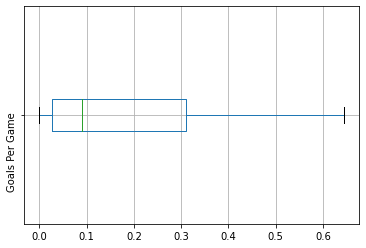

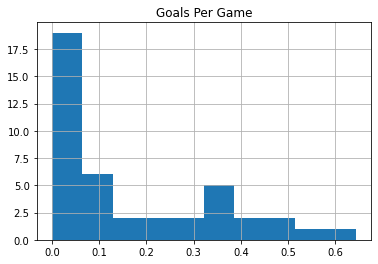

In [ ]:
#hist = df['Goals Per Game'].hist()

mean = df['Goals Per Game'].mean()

print(mean)

df.boxplot(column = 'Goals Per Game', rot= 90, vert = False)
df.hist(column='Goals Per Game')
